#TOPIC:-----LOANAPPROVAL PREDICITION:
#problem statement:-
"To predict wheather loan should be approved or not based on the applicant's demography,
financial,and credit history informations"
What is loan approval prediction?
In real world banking systems,when a person applies for a loan like (personal,home,eduction,etc),the bank uses various criteria to asses risk and decide whether to approve the laon or not.
These decision are based on:
*income of applicant
*loan amount requested
*credit history
*employment status
*dependents
*property location
we are training a model to replicate this decision by making use of past data.


#firstly we will check the path where to save the data!
#basically python don't have its own memory\storage management but when we work with files(like .csv),we need to interact with the file
#system of our computer and thats where os module come in.
import os

In [1]:
import os
os.getcwd()

'C:\\Users\\anjal'

In [2]:
#now we will import basic library like pandas for dataframe numpy for calculation seaborn for visualizations and matplotlib for editing in graph 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#now load the data saved in the same path to present it in the table format use padas lib
df=pd.read_csv('LoanApprovalPrediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#to get list of top 5 data we use dataset.head() and for last 5 data we will use dataset.tail()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#step 1 EDA(Exploratory Data Analysis steps :
#to check the rows and column
#to check missing values
#to check datatype
#value count
#visualization
#to check null values in all columns
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#to check the total no of rows and columns
df.shape

(598, 13)

In [7]:
#to check the per of value that has null value
df.isnull().sum()/598*100

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           2.006689
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.511706
Loan_Amount_Term     2.341137
Credit_History       8.193980
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

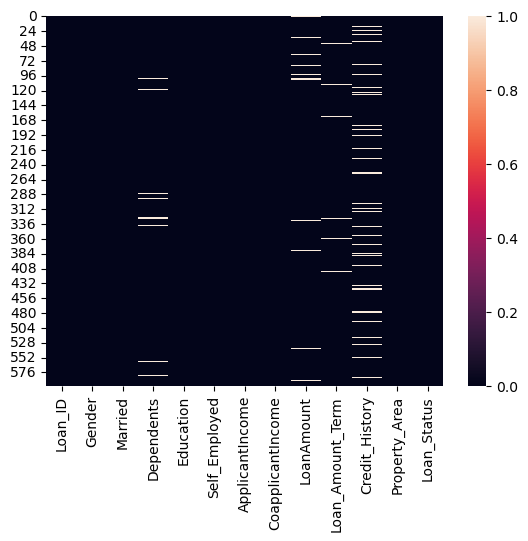

In [8]:
#visualize the null values using heatmap
sns.heatmap(df.isnull())
plt.show()

In [9]:
#to check the data type
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
#to check the values and there counts by using count function
df['Dependents'].value_counts()

Dependents
0.0    338
1.0    101
2.0     99
3.0     48
Name: count, dtype: int64

In [11]:
#use median to avoid the null values using median function to get the value
D=df['Dependents'].median()
D

0.0

In [12]:
#fill the empty data using fillna 
df['Dependents'].fillna(D,inplace=True)

In [13]:
#to check weather the values is placed
df['Dependents'].value_counts()

Dependents
0.0    350
1.0    101
2.0     99
3.0     48
Name: count, dtype: int64

In [14]:
df['LoanAmount'].value_counts()

LoanAmount
120.0    20
110.0    16
100.0    15
187.0    12
128.0    11
         ..
72.0      1
240.0     1
214.0     1
59.0      1
253.0     1
Name: count, Length: 199, dtype: int64

In [15]:
df['LoanAmount'].isnull().sum()

21

In [16]:
L=df['LoanAmount'].median()
print(L)

127.0


In [17]:
df['LoanAmount'].fillna(L,inplace=True)

In [18]:
print(df['LoanAmount'].isnull().sum())

0


In [19]:
print(df['LoanAmount'].value_counts())

LoanAmount
127.0    24
120.0    20
110.0    16
100.0    15
187.0    12
         ..
279.0     1
191.0     1
35.0      1
280.0     1
253.0     1
Name: count, Length: 199, dtype: int64


In [20]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    500
180.0     43
480.0     14
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [21]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [22]:
df['Loan_Amount_Term'].isnull().sum()

14

In [23]:
A=df['Loan_Amount_Term'].median()
A

360.0

In [24]:
df['Loan_Amount_Term'].fillna(A,inplace=True)

In [25]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    514
180.0     43
480.0     14
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [26]:
df['Credit_History'].unique()


array([ 1.,  0., nan])

In [27]:
df['Credit_History'].value_counts()


Credit_History
1.0    463
0.0     86
Name: count, dtype: int64

In [28]:
df['Credit_History'].isnull().sum()


49

In [29]:
H=df['Credit_History'].median()


In [30]:
df['Credit_History'].fillna(H,inplace=True)


In [31]:
df['Credit_History'].value_counts()


Credit_History
1.0    512
0.0     86
Name: count, dtype: int64

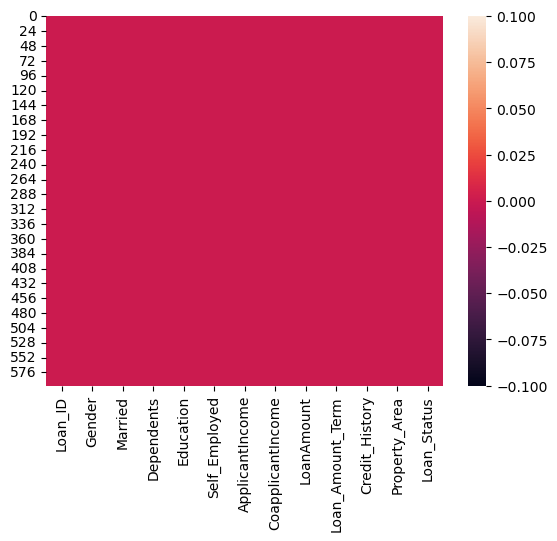

In [32]:
#check the null values if any column is left behind before visualization
sns.heatmap(df.isnull())
plt.show()

In [33]:
#to check duplicates rows in dataset
df.duplicated().sum()

0

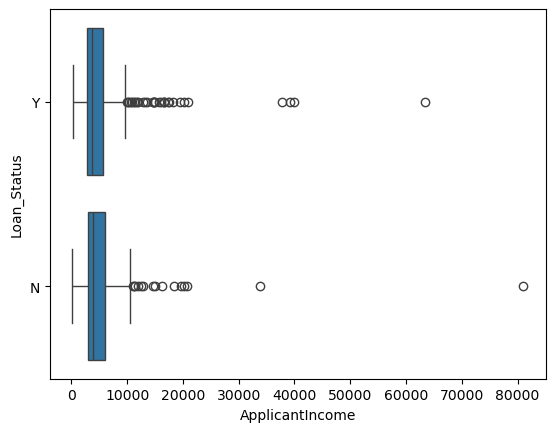

In [34]:
#to check the outlayer so that the data should be clean and prediction should be accurate
sns.boxplot(data=df,x='ApplicantIncome',y='Loan_Status')
plt.show()

<Axes: xlabel='LoanAmount', ylabel='Loan_Status'>

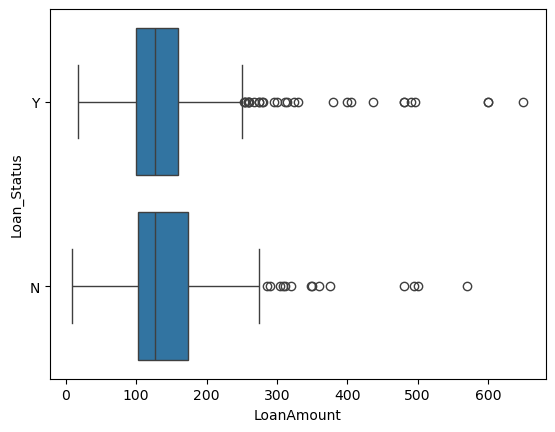

In [35]:
sns.boxplot(data=df,x='LoanAmount',y='Loan_Status')

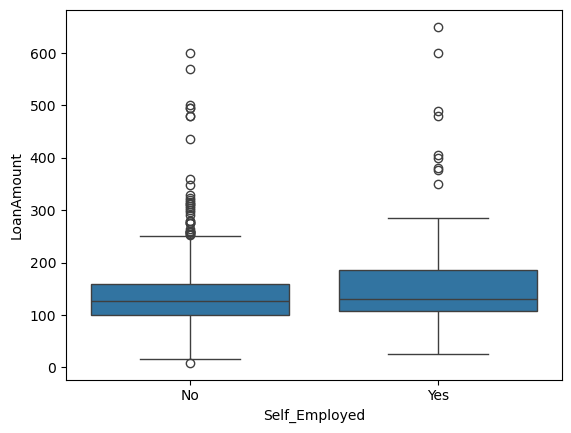

In [36]:
sns.boxplot(data=df,x='Self_Employed',y='LoanAmount')
plt.show()

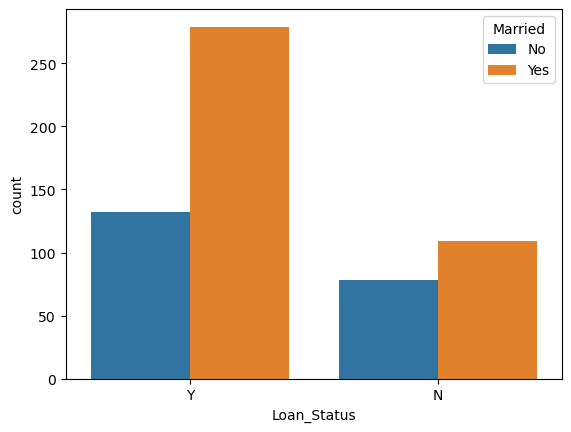

In [37]:
#column graph to check married input helps in output prediction
sns.countplot(data=df,x='Loan_Status',hue='Married')
plt.title=('loan')
plt.show()
#so conclusion is that it showed difference the one who is married get more loan then the single 
#because of the coapplicant or due to income by there siblings and spouse

<Axes: xlabel='Gender', ylabel='count'>

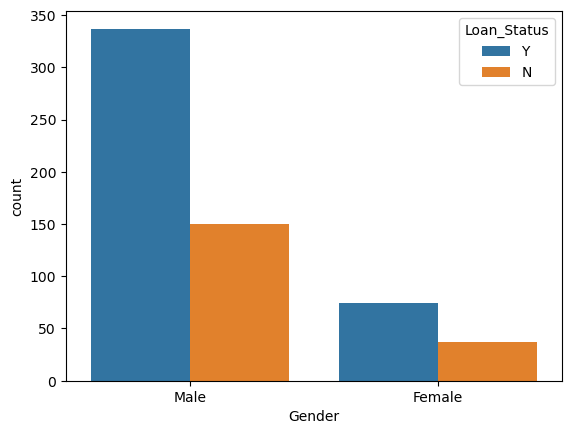

In [38]:
#so here we can see a grate difference between the male and female approval rate in the loan 
#as theremay be many reason such as credit score becase most of the male have bad credit score and due to which it become difficult 
#and vise versa for women it get too good as compared to male approval rate
sns.countplot(data=df,x='Gender',hue='Loan_Status')


In [39]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


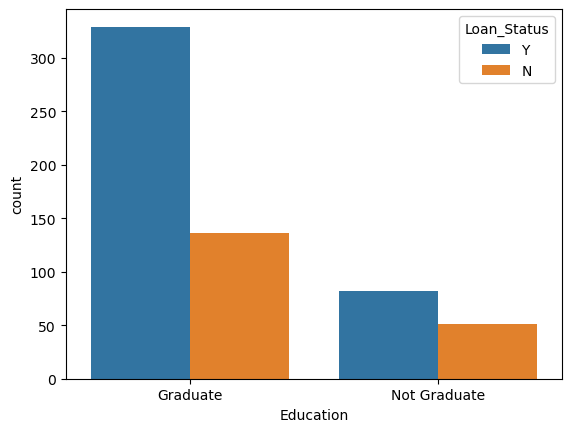

In [40]:
#to check the realtion between wheather the educated one and not educatated one does that makes difference in loan approval
#yes we can clearly see difference it may be beacuse of aware ness between the educated one and due to which there credit score may be not that good 
#because they have multiple loans and many more and vise versa.
sns.countplot(data=df,x='Education',hue='Loan_Status')
plt.show()

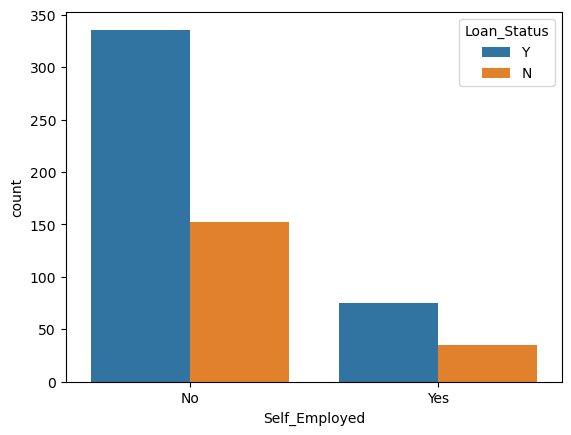

In [41]:
#to check the self employed and salaried person does that makes any difference in loan status?
#so here we can see that it makes a huge difference as the ask are very low as we can see selfemployed many deals with cash or any other mode
sns.countplot(data=df,x='Self_Employed',hue='Loan_Status')
plt.show()

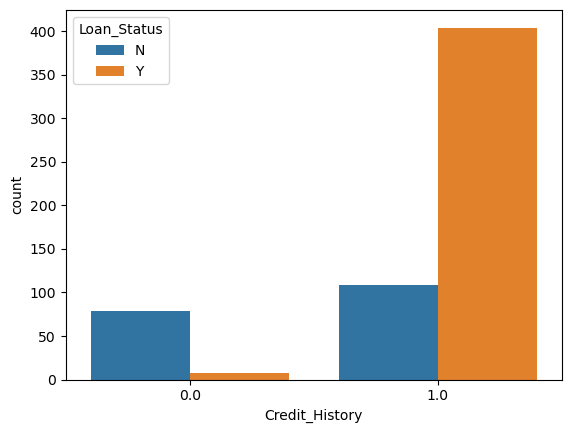

In [42]:
#here we can note that the person with 0 credit history perc of getting loan is less that of the person who already deals
#with the credit history 
sns.countplot(data=df,x='Credit_History',hue='Loan_Status')
plt.show()

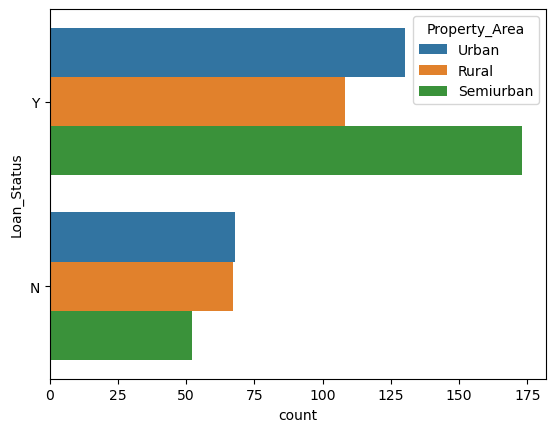

In [43]:
#so here we are visualising that if the area where they are leaving does that makes difference?
#we can note that it does not makes much difference but area is also plays an important role in credit giving decision
sns.countplot(data=df,y='Loan_Status',hue='Property_Area')
plt.show()

In [44]:
#to get top 5 rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [45]:
#1st delete the colums that are not important for data extraction
df1=df.drop(['Loan_ID'],axis=1)
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
593,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [46]:
#as the unwanted columns are delete now we can see that there are some object type data and doe numeric type data 
#as we know that machines dones not understand object type data so we will convert object type data into binary form by using 
#LabelEncoder it converts data into binary format 0,1,2etc
#first download the package ie sklearn then call the inner class LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [47]:
#give alise name for it 
le=LabelEncoder()

In [48]:
#check the data type of each column using the followig function
df1.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [49]:
#seprate the object type dat ia and numer data so that we can work more efficiently 
df1_obj=df1.select_dtypes(object)
df1_obj.dtypes

Gender           object
Married          object
Education        object
Self_Employed    object
Property_Area    object
Loan_Status      object
dtype: object

In [50]:
df1_num=df1.select_dtypes(['float64','int64'])


In [51]:
#insted of calling data column one by one and converting it we will call all together and convert it by using for loop and keep it in df1_obj
for col in df1_obj:
    df1_obj[col]=le.fit_transform(df1_obj[col])

In [52]:
#as we can see that the all columns are numeric type it's object and numeric data both are coverted into numbers but are not in proper 
#format or in same units so before giving this model to train we need to change the data unit 
df_new=pd.concat([df1_obj,df1_num],axis=1)
df_new

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,2,1,0.0,5849,0.0,127.0,360.0,1.0
1,1,1,0,0,0,0,1.0,4583,1508.0,128.0,360.0,1.0
2,1,1,0,1,2,1,0.0,3000,0.0,66.0,360.0,1.0
3,1,1,1,0,2,1,0.0,2583,2358.0,120.0,360.0,1.0
4,1,0,0,0,2,1,0.0,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0,0,0,1,0.0,2900,0.0,71.0,360.0,1.0
594,1,1,0,0,0,1,3.0,4106,0.0,40.0,180.0,1.0
595,1,1,0,0,2,1,1.0,8072,240.0,253.0,360.0,1.0
596,1,1,0,0,2,1,2.0,7583,0.0,187.0,360.0,1.0


In [53]:
#before using standard scaler we will split the data in 70 and 30 ie 70% train and 30% test data to see if the predicts is how much accurate
#if here we scale the data first and then use split method it will cause data leakage means here data will perform good in test data but fails 
#in real world data now we will call train_test_split for splitting the data traning data should be more then testing data
from sklearn.model_selection import train_test_split

In [54]:
#as scaling is always done on input data we will seprate the output column
X=df_new.drop(['Loan_Status'],axis=1)   
X

,Gender,Married,Education,Self_Employed,Property_Area,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,2,0.0,5849,0.0,127.0,360.0,1.0
1,1,1,0,0,0,1.0,4583,1508.0,128.0,360.0,1.0
2,1,1,0,1,2,0.0,3000,0.0,66.0,360.0,1.0
3,1,1,1,0,2,0.0,2583,2358.0,120.0,360.0,1.0
4,1,0,0,0,2,0.0,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0,0,0,0.0,2900,0.0,71.0,360.0,1.0
594,1,1,0,0,0,3.0,4106,0.0,40.0,180.0,1.0
595,1,1,0,0,2,1.0,8072,240.0,253.0,360.0,1.0
596,1,1,0,0,2,2.0,7583,0.0,187.0,360.0,1.0


In [55]:
#we will keep output in other column that is Y so we can match the perdicted output by real output
Y=df_new['Loan_Status']
Y


0      1
1      0
2      1
3      1
4      1
      ..
593    1
594    1
595    1
596    1
597    0
Name: Loan_Status, Length: 598, dtype: int32

In [56]:
#split the data in 70-30 using train_test_split and random state is like a lock key means same key-same combination -same result every time
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [57]:
#to check amount of data we have for train and test
X_train.shape,X_test.shape

((418, 11), (180, 11))

In [58]:
Y_train.shape,Y_test.shape

((418,), (180,))

In [59]:
#for scaling the data so that the data should be in same units 
from sklearn.preprocessing import StandardScaler

In [60]:
#give the alise name for StandardScaler
ss=StandardScaler()

In [61]:
#here will use fit_transform for training data : learn from traning data and apply on training data it tests itself and learn from training data
#with out knowing any thing about testing data
#if we will apply fit on the test data it will lead to data leakage it will train it self from test data and here it will show perfect accuracy 
#but fails when given out side data
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [62]:
#check samples of 0's and 1's
Y_train.value_counts()

Loan_Status
1    285
0    133
Name: count, dtype: int64

In [63]:
df_new['Loan_Status'].value_counts()

Loan_Status
1    411
0    187
Name: count, dtype: int64

In [64]:
#as we can see that data is unbalance i.e:187*2=374 which is less then majority so to avoid underfitting of model we will apply RandomOverSampler in
#training data:X_train,Y_train
#RandomOverSampler means to copy the record make duplicate record of minority class

In [65]:
#first install package
#!pip install imblearn

In [66]:
#import inbuilt class RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

In [67]:
#give alise name for the following
ros=RandomOverSampler()

In [68]:
#apply RandomOverSampleron training input and output X_train,Y_train because we need more data for traning the model b 
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)

In [69]:
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [70]:
X_train1.shape,Y_train1.shape

((570, 11), (570,))

In [71]:
#similar work as testing record 
#how many samples of 0's and1's
Y_test1.value_counts()

Loan_Status
1    126
0    126
Name: count, dtype: int64

In [72]:
Y_test1.shape,X_test1.shape

((252,), (252, 11))

In [73]:
 #creating the function
def create_model (model):
    model.fit(X_train1,Y_train1)         #this line trains the model using training dataset:X_train1-features for traning Y_train1-target value(0,1)
    Y_pred=model.predict(X_test1)        #after traning this line uses the test features(X_test1)to make prediction and store them in Y_pred
    print(confusion_matrix(Y_test1,Y_pred))  #to print the confusion matrix which show (TP,TN,FP,FN)
    print(classification_report(Y_test1,Y_pred)) #for the classification report that shows precision,recall,f1score
    return model

In [74]:
#we will import confusion matrix an classification report to use it from sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [75]:
#as the data set we have the output/target value are in binary so we will use logistic regression if our data whould have been in continous 
#numeric like house price age etc we whould use linear regression and process accordingly.
#but for now we will use logistic regression as our target value are in  yes/no or 1/0 etc.
#in my  case 1-laon approved and 0- loan rejected

from sklearn.linear_model import LogisticRegression
#we will give alise name to our function and use it by calling the function
lr=LogisticRegression()

In [76]:
lr=create_model(lr)

[[ 57  69]
 [ 18 108]]
              precision    recall  f1-score   support

           0       0.76      0.45      0.57       126
           1       0.61      0.86      0.71       126

    accuracy                           0.65       252
   macro avg       0.69      0.65      0.64       252
weighted avg       0.69      0.65      0.64       252



#summary :-LOGISTIC REGRESSION
#the model performed better in prediciting approved loan(class 1) with a high recall of 0.87 which means it correctly identify most approved loans.
#however it was less accurate in detecting not approved loan (class 0) with lower recall(0.51)
#overall logistic regressio  gave a balanced performance by accuracy of 0.69 that is 69%

In [77]:
#DECISION TREE CLASSIFIER
#it is a supervised machine learning algorithm it splits the data into small sub set like tree with branches and work on it
#why to use decision tree?
#capture non-linear relationship 
#works with both categorical and numerical data 
#no need for feature and scaling
#good alternative when logistic regression underperform
from sklearn.tree import DecisionTreeClassifier

In [78]:
dt=DecisionTreeClassifier(random_state=2)    #ginni


In [79]:
dt=create_model(dt)

[[78 48]
 [28 98]]
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       126
           1       0.67      0.78      0.72       126

    accuracy                           0.70       252
   macro avg       0.70      0.70      0.70       252
weighted avg       0.70      0.70      0.70       252



#SUMMARY---the model is better at predicting approved loans (class 1) with a recall of 0.86 ,which means it correctly caught most of the actual approved
# performance on class 0 (not approved laon) is lower with a recall of 0.54 meaning more false positive
#overall it performs slightly better than logistic regression in accuracy and recall for approved cases. 
#here accuracy is 0.70 that is 70%

In [80]:

dt1=DecisionTreeClassifier(random_state=1,criterion='entropy')

In [81]:
dt1=create_model(dt1)

[[76 50]
 [32 94]]
              precision    recall  f1-score   support

           0       0.70      0.60      0.65       126
           1       0.65      0.75      0.70       126

    accuracy                           0.67       252
   macro avg       0.68      0.67      0.67       252
weighted avg       0.68      0.67      0.67       252



In [82]:
dict={"Input column":X.columns,"IG":dt1.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values("IG",ascending=True,ignore_index=True)
df1

,Input column,IG
0,Gender,0.000000
1,Married,0.025397
2,Education,0.013172
3,Self_Employed,0.000000
4,Property_Area,0.016239
5,Dependents,0.026647
6,ApplicantIncome,0.371575
7,CoapplicantIncome,0.104563
8,LoanAmount,0.198279
9,Loan_Amount_Term,0.039475


#we trained a decision tree classifier using the entropy criterion which splits data based on information gain to reduce impurity.
#the model achieved 69% accuracy with strong performance in predicting approved loans(class 1)- recall=0.80-meaning it correctly identified 
#most approvals.
#feature importance analysis also helped us identify which feature the model relied on the most.
#while the accuracy is slightly lower than before this entropy based model provided better interpretability and insights into decision tree rules used 

In [83]:
#random forest:Random Forest is an ensemble learning method that combines multiple decision trees to improve accuracy and reduce overfitting. 
#here there is different tree that work with differnt algos ie ginni and entropy 

from sklearn.ensemble import RandomForestClassifier

In [84]:
'''for i in range(10,101):
    rfc=RandomForestClassifier(random_state=3,n_estimators=i)
    print("no of Decision Tree: ",i)
    rfc=create_model(rfc)'''

'for i in range(10,101):\n    rfc=RandomForestClassifier(random_state=3,n_estimators=i)\n    print("no of Decision Tree: ",i)\n    rfc=create_model(rfc)'

In [85]:
rfc=RandomForestClassifier(random_state=3,n_estimators=10)
rfc=create_model(rfc)


[[76 50]
 [27 99]]
              precision    recall  f1-score   support

           0       0.74      0.60      0.66       126
           1       0.66      0.79      0.72       126

    accuracy                           0.69       252
   macro avg       0.70      0.69      0.69       252
weighted avg       0.70      0.69      0.69       252



In [86]:
#SUMMARY--the model has balanced performance across both the classes
#it improved class 0 (loan not approved). it  gave a strong and balanced result with 70% accuracy it 

'''for i in range(10,101):
    rfc1=RandomForestClassifier(random_state=3,n_estimators=i,criterion="entropy")
    print("no of Decision Tree: ",i)
    rfc1=create_model(rfc1)'''

In [87]:
#randemforestclassifier
rfc1=RandomForestClassifier(random_state=3,n_estimators=20,criterion="entropy")
rfc1=create_model(rfc1)


[[ 67  59]
 [ 17 109]]
              precision    recall  f1-score   support

           0       0.80      0.53      0.64       126
           1       0.65      0.87      0.74       126

    accuracy                           0.70       252
   macro avg       0.72      0.70      0.69       252
weighted avg       0.72      0.70      0.69       252



In [ ]:
#conclusion:- the randomforest model achieved 70% accuracy and performed well in predicting approved loans
#(high recall of 0.87) however it struggle to identify rejected loans (recall  0.53) likely due to limited and imbalance data.

In [88]:
#gradient boost
from sklearn.ensemble import GradientBoostingClassifier

'''for i in range(10,101):
    gbc=GradientBoostingClassifier(random_state=1,n_estimators=i)
    print("no of decision trees: ",i)
    gbc=create_model(gbc)'''

In [89]:
gbc=GradientBoostingClassifier(random_state=1,n_estimators=93)
gbc=create_model(gbc)



[[70 56]
 [27 99]]
              precision    recall  f1-score   support

           0       0.72      0.56      0.63       126
           1       0.64      0.79      0.70       126

    accuracy                           0.67       252
   macro avg       0.68      0.67      0.67       252
weighted avg       0.68      0.67      0.67       252



In [ ]:
#the gradient boosting model achieved 67% accuracy. it performed moderately well in predicting approved loans(recall 0.79)
#but showed weaker performance for rejected laon(recall 0.56) overall the model is slightly less accurate

In [90]:
#extreme gradient boost:
#!pip install xgboost

In [91]:
 from xgboost import XGBClassifier

'''for i in range(10,101):
    xgb=XGBClassifier(random_state=3,n_estimators=i,reg_alpha=1)
    print("no of decision tree: ",i )
    xgb=create_model(xgb)'''

In [92]:
xgb=XGBClassifier(random_state=1,n_estimators=21,reg_alpha=1)
xgb=create_model(xgb)


[[ 65  61]
 [ 25 101]]
              precision    recall  f1-score   support

           0       0.72      0.52      0.60       126
           1       0.62      0.80      0.70       126

    accuracy                           0.66       252
   macro avg       0.67      0.66      0.65       252
weighted avg       0.67      0.66      0.65       252



In [ ]:
#the XGboost model achieved 66% accuracy. it performed moderately well in predicting approved loans(recall 0.80)
#but showed weaker performance for rejected laon(recall 0.52) overall the model is similar to gradient boosting

In [93]:
#svm- spport vector machine
#to check weather the data is linear or non-linear
from sklearn.svm import LinearSVC

In [94]:
svm=LinearSVC(random_state=1)
svm=create_model(svm)

[[ 57  69]
 [ 14 112]]
              precision    recall  f1-score   support

           0       0.80      0.45      0.58       126
           1       0.62      0.89      0.73       126

    accuracy                           0.67       252
   macro avg       0.71      0.67      0.65       252
weighted avg       0.71      0.67      0.65       252



In [ ]:
#the linear svm model achieved 67% accuracy .it showed strong performance in predicting approved loans(recall 0.89)
#but struggle to correctly identify rejected applications(recall 0.45) 

In [95]:
# we will add error >0 and <1 
svm1=LinearSVC(random_state=1,C=0.9)
svm1=create_model(svm1)


[[ 57  69]
 [ 14 112]]
              precision    recall  f1-score   support

           0       0.80      0.45      0.58       126
           1       0.62      0.89      0.73       126

    accuracy                           0.67       252
   macro avg       0.71      0.67      0.65       252
weighted avg       0.71      0.67      0.65       252



In [ ]:
#as we ca see there is no change in the output or the accuracy so the given data is notlinear.

In [96]:
#for non-linear
from sklearn.svm import SVC

In [97]:
poly_svc=SVC(random_state=1,kernel='poly')

In [98]:
poly_svc=create_model(poly_svc)

[[ 63  63]
 [ 12 114]]
              precision    recall  f1-score   support

           0       0.84      0.50      0.63       126
           1       0.64      0.90      0.75       126

    accuracy                           0.70       252
   macro avg       0.74      0.70      0.69       252
weighted avg       0.74      0.70      0.69       252



In [ ]:
#the polynomial SVM model received 70% accuracy it performed very well on predicting approved loans(recall=90)
#and showed good precision (0.84) for rejected ones.

In [99]:
#RBF kernal SVM:
r_svc=SVC(random_state=1,kernel='rbf')
r_svc=create_model(r_svc)

[[ 63  63]
 [ 22 104]]
              precision    recall  f1-score   support

           0       0.74      0.50      0.60       126
           1       0.62      0.83      0.71       126

    accuracy                           0.66       252
   macro avg       0.68      0.66      0.65       252
weighted avg       0.68      0.66      0.65       252



In [ ]:
#the rbf kernel svm achieved 66% accuracy it performed moderately, with good recall for approved loan(0.83) but low recall(0.50)
# for rejected fair performance but slightly weaker than polynomial SVM

   Model                    Accuracy                       Recall(class0)          Recall(class1)          Best for
-Random Forest                70%                            0.53                       0.87                predicting approved loans
-Gradient Boosting            67%                            0.56                       0.79                balanced but moderate performer
-XGboost                      66%                            0.52                       0.80                handles imbalance
-Linear SVM                   67%                            0.45                       0.89                high recall for approval
-Poly Kernel SVM              70%                            0.50                       0.90                best overall balance
-RBF kernel SVM               66%                            0.50                       0.83                decent but slightly underperforming

#CONCLUSION--
1.All models showed good performance in predicting approved loans(class1) but struggle with the rejected cases(class 0), indicating 
possible class imbalance and limited data
2.the ploynomial kernel svm performed the best overall
-highest accuracy (70%)
-highest recall for class 1(0.90)
-strong balance between precision and recall for both classes
3.random forest also gave strong results with 70% accuracy and high recall for fast predictions
